# А/Б-тесты с Глебом Михайловым

АБ тесты - это метод проверки гипотез с помощью экспериментов

А - котнтрольная группа <br>
Б - тестовая <br>
АБ тесты нужны чтобы изолировать внешние изменения


Проблемы: <br>
Внешние факторы<br>
Случайность<br>

Составляющие АБ теста: <br>
Эксперимент(сбор данных)<br>
Стат. тест

## Метрики для тестов с бинарным ответом
(Используется для задач классификации)<br>
Типы ошибок: <br>
1 рода - ложноположительные (у пациента диагностируют заболевания, хотя его нет)<br>
2 рода - ложноотрицательные (у пациента не обнаруживают заболевание)

Формула процент ошибок для ошибок первого рода (FPR) - ложноположительные / ложные % <br>
Формула процент ошибок для ошибок второго рода (FNR) - ложноотрицательные / положительные % <br>
% положительных правильных 1 (Sensitivity) - FNR <br>
% отрицательных правильных 1 (Specificity) - FPR <br>

Sensitivityтеста на ковид 65% - это означает, что из 100 больных человек, тест покажет, что больны только 65 (у 45 человек покажет, что нет, хотя на самом деле есть)<br>
Specificity теста на ковид 99,9% - это означает, что из 1000 здоровых человек, тест покажет, что 1 болен

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv('data/covid.csv')

In [6]:
df.head()

,y_true,y_pred1,y_pred2
0,0,0,0
1,1,1,0
2,1,0,1
3,0,1,0
4,1,0,1


1) y_true - реальность (0 - здоров, 1 - болен)<br>
2) y_pred1 - резульатат 1 теста на ковид<br>
3) y_pred2 - результат 2 теста на ковид<br>

In [7]:
len(df[df['y_true'] != df['y_pred1']]) / len(df)

0.18

In [8]:
(df['y_true'] != df['y_pred1']).mean()

0.18

In [9]:
(df['y_true'] != df['y_pred2']).mean()

0.18

### ACCURACY

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(df['y_true'], df['y_pred1'])

0.82

In [11]:
accuracy_score(df['y_true'], df['y_pred2'])

0.82

### POSITIVE AND NEGATIVE

In [12]:
positives = df[df['y_true'] == 1].copy()

In [13]:
negatives = df[df['y_true'] == 0].copy()

#### FNR

In [14]:
(positives['y_true'] != positives['y_pred1']).mean() # в 29% случаев мы пропускаем больного FNR

0.2949852507374631

In [15]:
(positives['y_true'] != positives['y_pred2']).mean() # в 34% случаев мы пропускаем больного FNR

0.344149459193707

#### FPR

In [16]:
(negatives['y_true'] != negatives['y_pred1']).mean() # в 6% случаев мы считаем больного здоровым

0.061037639877924724

In [17]:
(negatives['y_true'] != negatives['y_pred2']).mean() # в 1% случаев мы считаем больного здоровым

0.01017293997965412

#### Sensitivity

In [18]:
accuracy_score(positives['y_true'], positives['y_pred1'])

0.7050147492625368

In [19]:
accuracy_score(positives['y_true'], positives['y_pred2'])

0.655850540806293

#### Specificity

In [20]:
accuracy_score(negatives['y_true'], negatives['y_pred1'])

0.9389623601220752

In [21]:
accuracy_score(negatives['y_true'], negatives['y_pred2'])

0.9898270600203459

#### Sensitivity and Specificity in SKLEARN

In [22]:
from sklearn.metrics import recall_score

In [23]:
recall_score(df['y_true'], df['y_pred1'])

0.7050147492625368

In [24]:
recall_score(df['y_true'], df['y_pred2'])

0.655850540806293

In [25]:
recall_score(df['y_true'], df['y_pred1'], pos_label=0)

0.9389623601220752

In [26]:
recall_score(df['y_true'], df['y_pred2'], pos_label=0)

0.9898270600203459

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

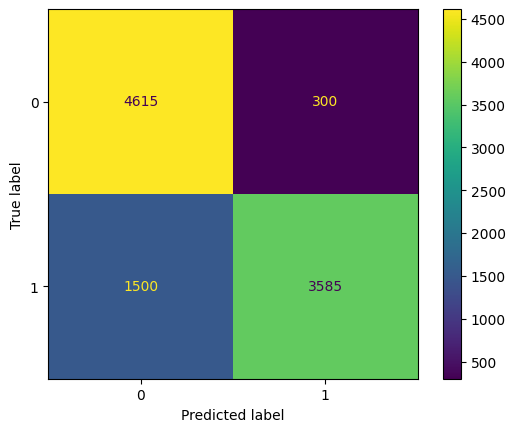

In [28]:
cm = confusion_matrix(df["y_true"], df['y_pred1'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

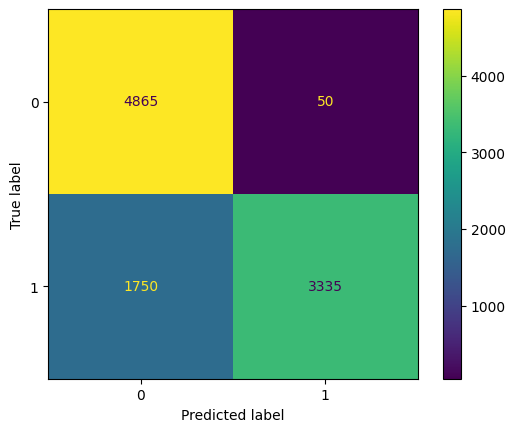

In [29]:
cm = confusion_matrix(df["y_true"], df['y_pred2'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [30]:
df = pd.read_csv("data/pregnancy.csv")

In [31]:
df.head()

,y_true,y_pred1,y_pred2
0,0,0,0
1,1,1,1
2,1,1,1
3,0,1,0
4,1,1,1


In [32]:
accuracy_score(df['y_true'], df['y_pred1']) # тест выдает правильный результат с 95% вероятностью

0.95

In [33]:
accuracy_score(df['y_true'], df['y_pred2'])

0.95

#### Sensitivity

In [34]:
recall_score(df["y_true"], df["y_pred1"]) # в случае беремененности у 99% показывает, что беременна

0.9901671583087512

In [35]:
recall_score(df["y_true"], df["y_pred2"]) # в случае беремененности у 95% показывает, что беременна

0.9508357915437562

#### Specificity

In [36]:
recall_score(df["y_true"], df["y_pred1"], pos_label=0) # в случае не беремененности у 90% показывает, что не беременна

0.9084435401831129

In [37]:
recall_score(df["y_true"], df["y_pred2"], pos_label=0) # в случае не беремененности у 94% показывает, что не беременна

0.9491353001017294

## А/Б ТЕСТЫ. Статистический тест

Отвечает на вопрос привели ли изменения к улучшению или нет

Метрики:<br>
- TPR - процент случаев, когда мы говором, что разница есть и одна действительна есть (ошибки 2 рода) <br>
- FPR - процент случаев, когда мы говором, что разница есть, но ее нет(ошибки 1 рода)<br>
- MDE (минимальный эффект) - минимальная реальная разница, которую может обнаружить тест

In [2]:
import numpy as np

### Метод монте карло

In [39]:
a = np.random.binomial(1, 0.03, size=1000).mean()
b = np.random.binomial(1, 0.05, size=1000).mean()

In [40]:
a, b

(0.037, 0.051)

In [41]:
n = 1000
result = []
for i in range(n):
    a = np.random.binomial(1, 0.03, size=1000).mean()
    b = np.random.binomial(1, 0.05, size=1000).mean()
    result.append((a, b))

In [42]:
df = pd.DataFrame(result, columns=["a", "b"])

In [43]:
df

,a,b
0,0.027,0.060
1,0.036,0.043
2,0.034,0.050
3,0.041,0.042
4,0.035,0.051
...,...,...
995,0.030,0.054
996,0.032,0.057
997,0.020,0.056
998,0.024,0.056


In [44]:
df[df['a'] > df['b']]

,a,b
44,0.040,0.036
46,0.036,0.033
65,0.039,0.037
71,0.039,0.038
77,0.049,0.037
118,0.041,0.040
460,0.041,0.039
471,0.042,0.041
552,0.039,0.033
566,0.048,0.042


даже если мы знаем реальную конверсию(в нашем случае а = 3%, b = 5%), за счет того, что выборки недостаточно велики, бывают случаи, когда конверсия в выборке а больше, чем в b <br>
https://glebmikha.github.io/ab-test-calculator-by-gleb-mikhaylov/

In [45]:
a = np.random.binomial(1, 0.03, size=1484).mean()
b = np.random.binomial(1, 0.05, size=1484).mean()

In [46]:
a, b

(0.03369272237196765, 0.04110512129380054)

In [47]:
a * 1484, b * 1484

(49.99999999999999, 61.0)

In [117]:
a, b = np.random.binomial(1484, 0.03), np.random.binomial(1484, 0.05)

In [118]:
a, b

(47, 72)

In [113]:
from statsmodels.stats.proportion import proportions_ztest

In [114]:
def test(conv_a,conv_b,size_a,size_b,significance=0.05):
  _, p_value = proportions_ztest([conv_a, conv_b],
                                 [size_a, size_b],
                                 alternative='two-sided')
  return p_value < significance

In [119]:
test(47, 72, 1484, 1484)

True

### TPR

In [137]:
n = 100000
result = []
for _ in range(n):
  a = np.random.binomial(1484,0.03)
  b = np.random.binomial(1484,0.05)
  result.append((a,b))

In [138]:
df = pd.DataFrame(result, columns=["a", "b"])

In [139]:
df

,a,b
0,38,66
1,29,71
2,64,66
3,42,89
4,38,78
...,...,...
99995,52,62
99996,58,67
99997,44,77
99998,39,75


In [140]:
df['test'] = df.apply(lambda row: test(row['a'],row['b'],1484,1484),axis=1)

In [141]:
df

,a,b,test
0,38,66,True
1,29,71,True
2,64,66,False
3,42,89,True
4,38,78,True
...,...,...,...
99995,52,62,False
99996,58,67,False
99997,44,77,True
99998,39,75,True


In [142]:
df["test"].mean()

0.79966

### FPR

In [144]:
from tqdm.notebook import tqdm

In [145]:
n = 100000
result = []
for _ in tqdm(range(n)):
  a = np.random.binomial(1484,0.03)
  b = np.random.binomial(1484,0.03)
  result.append((a,b))

  0%|          | 0/100000 [00:00<?, ?it/s]

In [146]:
df = pd.DataFrame(result,columns=['a','b'])

In [147]:
df

,a,b
0,42,44
1,43,45
2,50,50
3,54,47
4,40,46
...,...,...
99995,42,48
99996,50,44
99997,36,40
99998,43,51


In [150]:
df['test'] = df.apply(lambda row: test(row['a'],row['b'],1484,1484),axis=1)

In [151]:
df

,a,b,test
0,42,44,False
1,43,45,False
2,50,50,False
3,54,47,False
4,40,46,False
...,...,...,...
99995,42,48,False
99996,50,44,False
99997,36,40,False
99998,43,51,False


In [152]:
df['test'].mean()

0.05003

### MDE

In [153]:
from tqdm import tqdm

In [154]:
tqdm.pandas()

In [159]:
n = 1000
result = []
for _ in tqdm(range(n)):
  a = np.random.binomial(1484,0.03)
  b = np.random.binomial(1484,0.04)
  result.append((a,b))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 253233.35it/s]


In [160]:
df = pd.DataFrame(result,columns=['a','b'])

In [161]:
df['test'] = df.progress_apply(lambda row: test(row['a'],row['b'],1484,1484),axis=1)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 12015.45it/s]


In [162]:
df['test'].mean()

0.346

## Проверка гипотез

Нулевая гипотеза (H0) - никакой разницы между А и Б нет <br>
Альтернативная гипотеза (H1) - разница между А и Б есть

In [6]:
np.random.binomial(10, 0.5)

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1])

In [7]:
n = 1000
result = []
for _ in range(n):
  result.append(np.random.binomial(10, 0.5))

In [11]:
df = pd.DataFrame(result)

In [13]:
df.mean()

0    5.048
dtype: float64

In [14]:
df["dev"] = abs(5-df[0])

In [15]:
df

,0,dev
0,5,0
1,6,1
2,3,2
3,5,0
4,7,2
...,...,...
995,3,2
996,4,1
997,6,1
998,7,2


### COIN CHECK

MDE - 10% <br>
Power (1- beta) - 80% <br>
Significance (alpha) - 5% <br>

#### FPR

In [61]:
sample_size = 200

In [62]:
n = 10000
result = []
for i in range(n):
    np.random.seed(i)
    result.append(np.random.binomial(sample_size, 0.5))

In [63]:
df = pd.DataFrame(result)

In [64]:
df["dev"] = abs(sample_size / 2 - df[0])

In [65]:
(df["dev"] >= sample_size * 0.07).mean() # aplha

0.0383

#### TPR

In [66]:
mde = 0.1

In [67]:
n = 10000
result = []
for i in range(n):
    np.random.seed(i)
    result.append(np.random.binomial(sample_size, 0.5 + mde))

In [68]:
df = pd.DataFrame(result)

In [69]:
df["dev"] = abs(sample_size / 2 - df[0])

In [71]:
(df["dev"] >= sample_size * 0.07).mean()

0.7891

### Satisfation check
удовлетворенность клиентов

H0 - 80% <br>
H1 < 80 % 

MDE - 10% <br>
Power (1- beta) - 80% <br>
Significance (alpha) - 5% <br>

In [127]:
sample_size = 115 # клиентов надо будет опросить

In [128]:
n = 10000
result = []
for i in range(n):
    np.random.seed(i)
    result.append(np.random.binomial(sample_size, 0.8))
df = pd.DataFrame(result)
df["dev"] = df[0] - sample_size * 0.8
threshold = sample_size * 0.06
(df["dev"] <= -threshold).mean() # aplha

0.0685

In [130]:
mde = 0.1
n = 10000
result = []
for i in range(n):
    np.random.seed(i)
    result.append(np.random.binomial(sample_size, 0.8 - mde))
df = pd.DataFrame(result)
df["dev"] = df[0] - sample_size * 0.8
(df["dev"] <= -threshold).mean() # Power

0.8389

Принимаем альтернативную гипотезу при (sample_size * 0.06) 7 неудовлетворенных клиентах

## P-value

In [5]:
sample_size = 115 # клиентов надо будет опросить
n = 10000
result = []
for i in range(n):
    np.random.seed(i)
    result.append(np.random.binomial(sample_size, 0.8))
df = pd.DataFrame(result)
df["dev"] = df[0] - sample_size * 0.8


In [6]:
(df["dev"] <= -8).mean() #p_value

0.0437

In [8]:
devs = list(range(0, int(sample_size * 0.8)+1))

In [10]:
result = []
for dev in devs:
    result.append((dev, (df["dev"] <= -dev).mean()))

In [16]:
pvals = pd.DataFrame(result,columns=['people','p-values'])

In [17]:
pvals

,people,p-values
0,0,0.5348
1,1,0.4498
2,2,0.3632
3,3,0.2777
4,4,0.2067
...,...,...
88,88,0.0000
89,89,0.0000
90,90,0.0000
91,91,0.0000


In [18]:
from statsmodels.stats.proportion import proportions_ztest

In [19]:
proportions_ztest(84,115,0.8,alternative='smaller')

(-1.6811962678215244, 0.046362399106540116)

In [20]:
pvals['pval_ztest'] = pvals['people'].apply(lambda x: proportions_ztest(92-x,115,0.8,alternative='smaller')[1])

In [21]:
pvals

,people,p-values,pval_ztest
0,0,0.5348,0.500000
1,1,0.4498,0.409252
2,2,0.3632,0.325579
3,3,0.2777,0.251815
4,4,0.2067,0.189428
...,...,...,...
88,88,0.0000,0.000000
89,89,0.0000,0.000000
90,90,0.0000,0.000000
91,91,0.0000,0.000000
